In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import datetime as dt
import theano.tensor as tt
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; 
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/nacional_covid19.csv', sep=',')
df['dias'] = pd.to_datetime(df['fecha'])
df['dias'] = (df['dias'] - np.datetime64('2020-02-25')) / np.timedelta64(1, 'D')
df.head()

,fecha,casos,altas,fallecimientos,ingresos_uci,hospitalizados,dias
0,2020-02-25,3,NaN,NaN,NaN,NaN,0.0
1,2020-02-26,10,NaN,NaN,NaN,NaN,1.0
2,2020-02-27,16,NaN,NaN,NaN,NaN,2.0
3,2020-02-28,32,NaN,NaN,NaN,NaN,3.0
4,2020-02-29,44,NaN,NaN,NaN,NaN,4.0


In [3]:
t = len(df)
t

27

In [4]:
x = df['dias']
y = df['casos']
a = df['altas']
f = df['fallecimientos']
g = df['ingresos_uci']
h = df['hospitalizados']

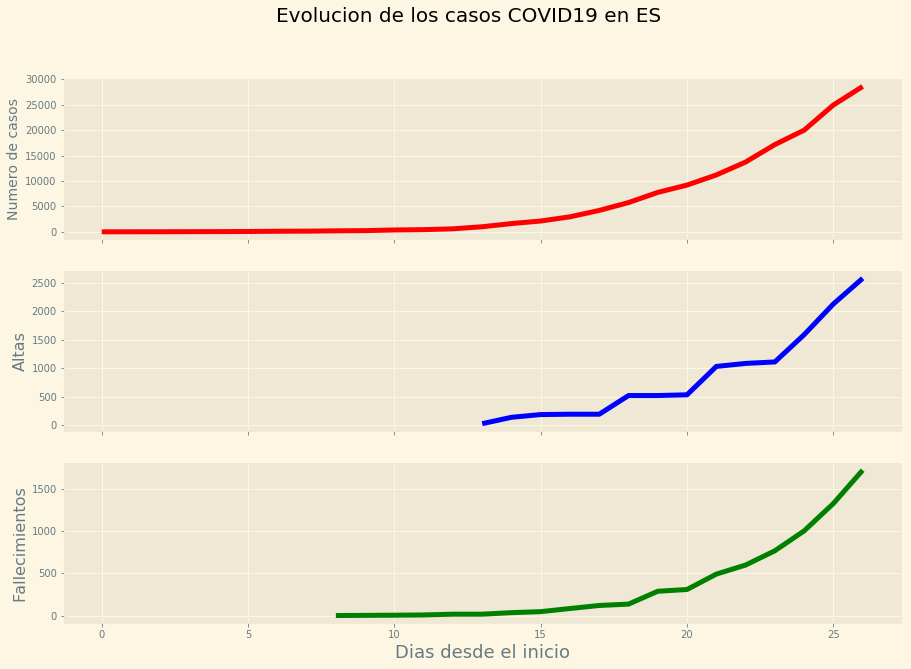

In [5]:
with plt.style.context('Solarize_Light2'):
   
    fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True, figsize=(15, 10))
    fig.suptitle('Evolucion de los casos COVID19 en ES', fontsize=20)
    plt.rcParams['lines.linewidth'] = 5
    
    ax1.plot(x, y, label='casos', color='r')  
    ax1.set_ylabel('Numero de casos', fontsize=14)
    
    ax2.plot(x, a, label='altas', color= 'b') 
    ax2.set_ylabel('Altas', fontsize=16)
    
    ax3.plot(x, f, label='hospitalizados', color='g') 
    ax3.set_xlabel('Dias desde el inicio', fontsize=18)
    ax3.set_ylabel('Fallecimientos', fontsize=16)
    
plt.show()

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


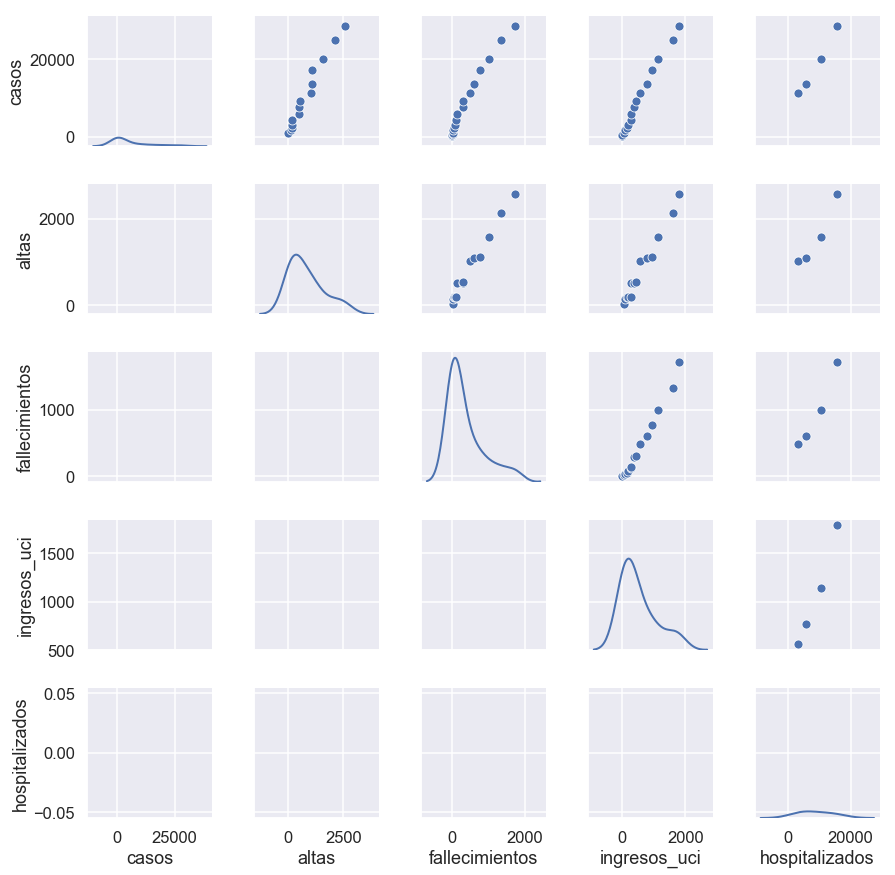

In [6]:
sns.set(context= "talk", style="darkgrid")
dfn = df.drop(columns=["fecha","dias"])
g = sns.PairGrid(dfn)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

## Kernelized Regression

In [7]:
def gauss_kernel(x, n_knots):
    """
    Simple Gaussian radial kernel
    """
    knots = np.linspace(x.min(), x.max(), n_knots)    
    w = 2 
    return np.array([np.exp(-(x-k)**2/w) for k in knots])

In [8]:
n_knots = 50

In [9]:
with pm.Model() as kernel_model:
    gamma = pm.Cauchy('gamma', alpha=0, beta=1, shape=n_knots)
    sd = pm.Uniform('sd', 0, 10)
    mu = pm.math.dot(gamma, gauss_kernel(x, n_knots))
    yl = pm.Normal('yl', mu=mu, sd=sd, observed=y)
    kernel_trace = pm.sample(10000, step=pm.Metropolis())

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [gamma]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [12]:
pm.summary(chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
gamma__0,-5.976557,9.553492e+01,9.547685e+00,-134.267606,116.041315,1.026957,7.000821
gamma__1,-36.387839,3.625329e+01,3.613282e+00,-84.594625,23.793708,1.244529,2.616910
gamma__2,-39.145339,3.514470e+01,3.499872e+00,-111.523629,6.049856,1.474438,2.126321
gamma__3,17.671857,3.558990e+01,3.545356e+00,-38.744295,83.967041,4.644029,1.143494
gamma__4,-65.679890,6.562014e+01,6.554412e+00,-167.608858,38.525004,1.122363,3.578293
gamma__5,-15.593774,2.127704e+01,2.101465e+00,-53.231268,15.146198,3.728013,1.296406
gamma__6,31.446699,3.632399e+01,3.618163e+00,-22.308612,85.443810,1.088846,3.912594
gamma__7,2.914021,3.097337e+01,3.081122e+00,-67.929520,42.996502,2.347208,1.595929
gamma__8,-45.408092,4.901161e+01,4.890264e+00,-112.113569,27.858818,1.098200,3.890633
gamma__9,4.695068,4.140823e+01,4.129535e+00,-56.656215,65.193460,1.106202,3.762248


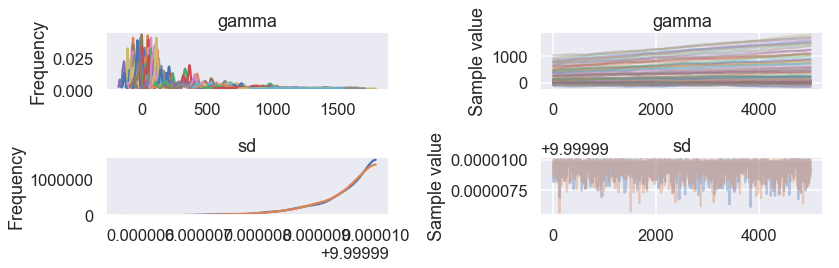

In [17]:
chain = kernel_trace[5000:]
pm.traceplot(chain);

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 500/500 [00:00<00:00, 691.35it/s]


Text(0,0.5,'casos')

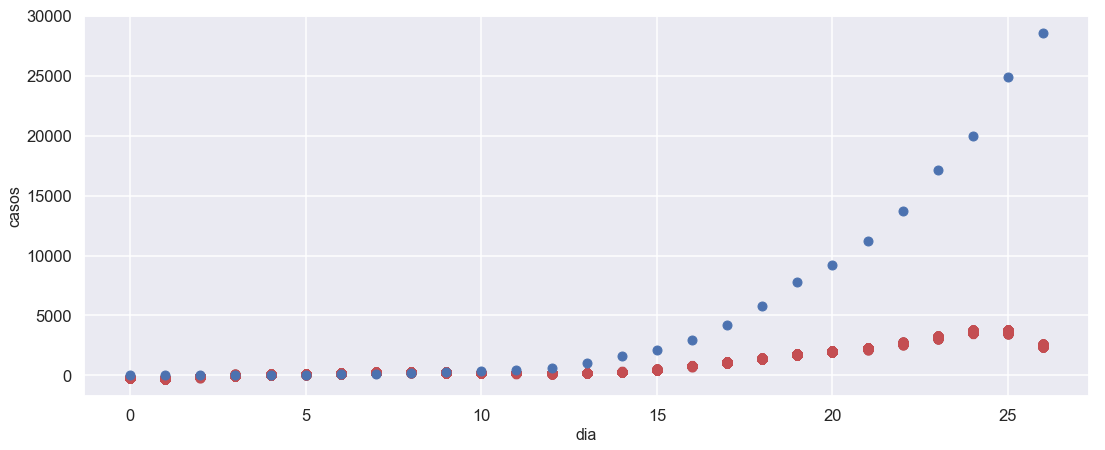

In [14]:
ppc = pm.sample_ppc(chain, model=kernel_model, samples=500)

fig = plt.figure(figsize=(18, 7))
plt.plot(x, ppc['yl'].T, 'ro', alpha=0.1)
plt.plot(x, y, 'bo')

plt.xlabel('dia', fontsize=16, rotation=0)
plt.ylabel('casos', fontsize=16, rotation=90 )

Text(0,0.5,'casos')

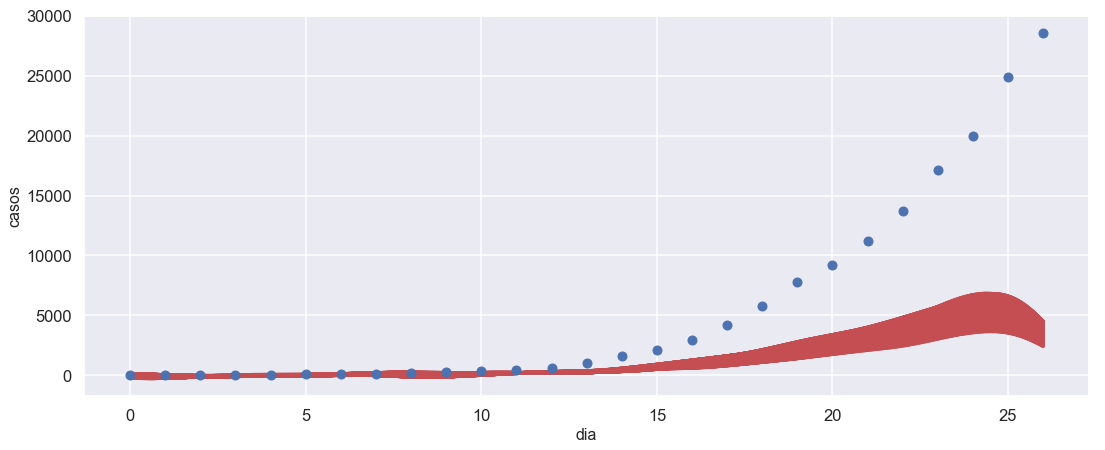

In [15]:
fig = plt.figure(figsize=(18, 7))
new_x = np.linspace(x.min(), x.max(), 2000)
k = gauss_kernel(new_x, n_knots)
gamma_pred = chain['gamma']
for i in range (1000):
    idx = np.random.randint(0, len(gamma_pred))
    y_pred = np.dot(gamma_pred[idx], k)
    plt.plot(new_x, y_pred, 'r-', alpha=.5)
plt.plot(x, y, 'bo')
plt.xlabel('dia', fontsize=16)
plt.ylabel('casos', fontsize=16, rotation=90)

# Gaussian Processes

In [16]:
squared_distance = lambda x, y: np.array([[(x[i] - y[j])**2 for i in range(len(x))] for j in range(len(y))])

Text(0,0.5,'fallecimientos')

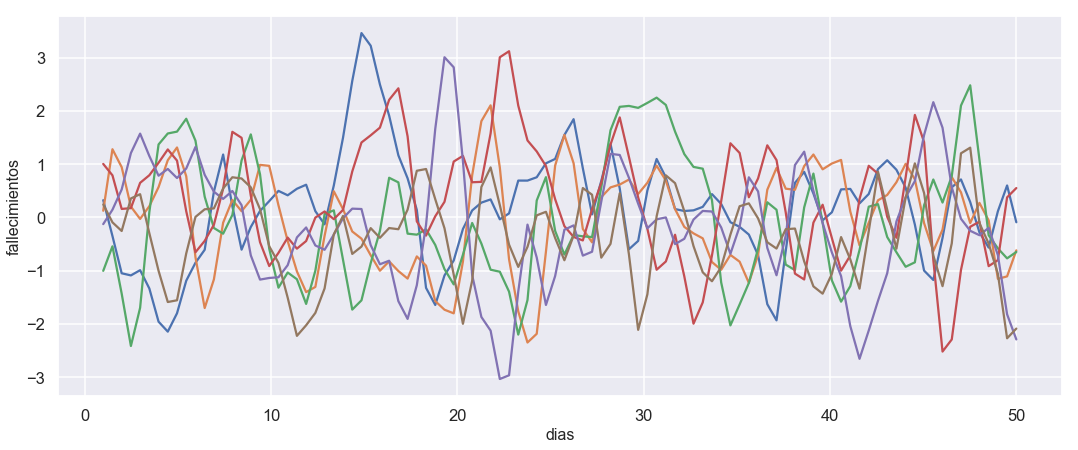

In [18]:
fig = plt.figure(figsize=(18, 7))
np.random.seed(1)
test_points = np.linspace(1, 50, 100)
cov = np.exp(-squared_distance(test_points, test_points))
plt.plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=6).T)
plt.xlabel('dias', fontsize=16)
plt.ylabel('fallecimientos', fontsize=16, rotation=90)

/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Text(0,0.5,'casos')

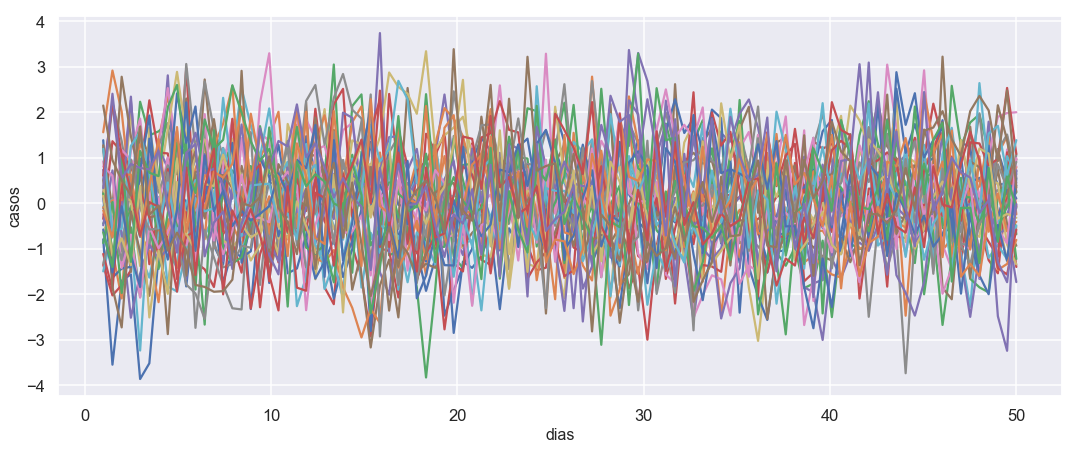

In [19]:
fig = plt.figure(figsize=(18, 7))
np.random.seed(1)
eta = 1
rho = 0.5
sigma = 0.03
D = squared_distance(test_points, test_points)

cov = eta * np.exp(-rho * D)
diag = eta * sigma

np.fill_diagonal(cov, diag)

for i in range(6):
    plt.plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=6).T)
plt.xlabel('dias', fontsize=16)
plt.ylabel('casos', fontsize=16, rotation=90)

Text(0,0.5,'casos')

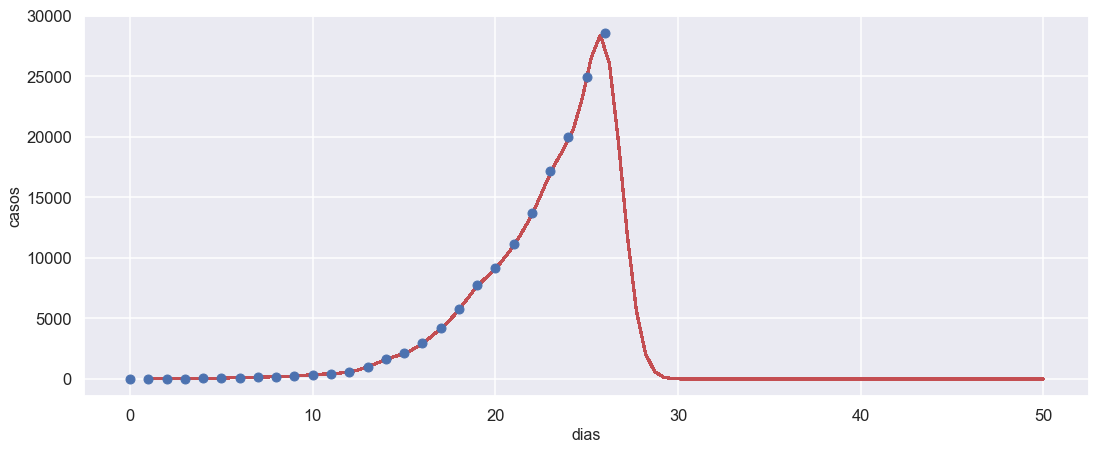

In [20]:
fig = plt.figure(figsize=(18, 7))
np.random.seed(1)

K_oo = eta * np.exp(-rho * D) 

D_x = squared_distance(x, x)
K = eta * np.exp(-rho * D_x)
diag_x = eta + sigma
np.fill_diagonal(K, diag_x)

D_off_diag = squared_distance(x, test_points)
K_o = eta * np.exp(-rho * D_off_diag)

# Posterior mean
mu_post = np.dot(np.dot(K_o, np.linalg.inv(K)), y)
# Posterior covariance
SIGMA_post = K_oo - np.dot(np.dot(K_o, np.linalg.inv(K)), K_o.T)


for i in range(1000):
    fx = stats.multivariate_normal.rvs(mean=mu_post, cov=SIGMA_post)
    plt.plot(test_points, fx, 'r-', alpha=0.5)

plt.plot(x, y, 'o')
 
plt.xlabel('dias', fontsize=16)
plt.ylabel('casos', fontsize=16, rotation=90)


Text(0,0.5,'casos')

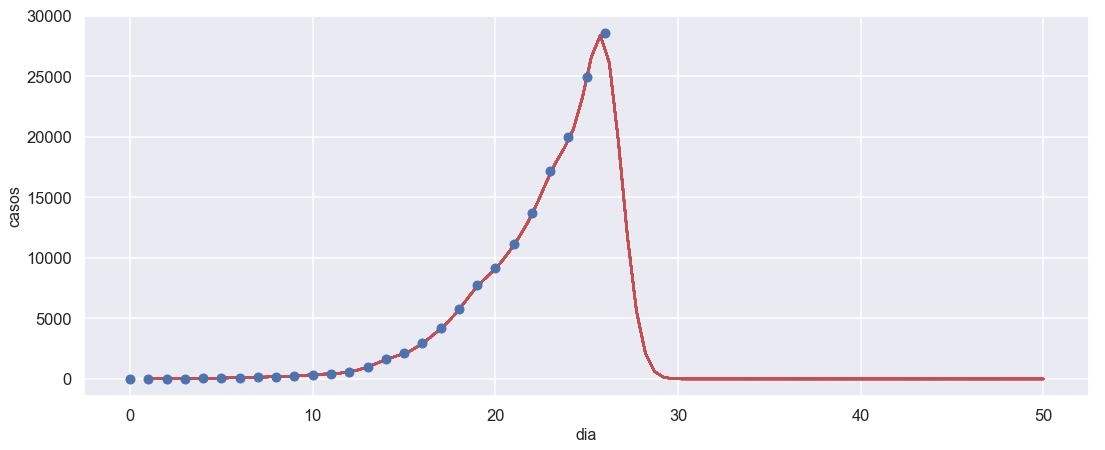

In [21]:
fig = plt.figure(figsize=(18, 7))
np.random.seed(1)

K_oo = eta * np.exp(-rho * D) 

D_x = squared_distance(x, x)
K = eta * np.exp(-rho * D_x)
diag_x = eta + sigma
np.fill_diagonal(K, diag_x)

D_off_diag = squared_distance(x, test_points)
K_o = eta * np.exp(-rho * D_off_diag)

# Posterior mean
mu_post = np.dot(np.dot(K_o, np.linalg.inv(K)), y)
# Posterior covariance
SIGMA_post = K_oo - np.dot(np.dot(K_o, np.linalg.inv(K)), K_o.T)


for i in range(100):
    fx = stats.multivariate_normal.rvs(mean=mu_post, cov=SIGMA_post)
    plt.plot(test_points, fx, 'r-', alpha=0.1)

plt.plot(x, y, 'o')
plt.xlabel('dia', fontsize=16)
plt.ylabel('casos', fontsize=16, rotation=90)


Text(0,0.5,'casos')

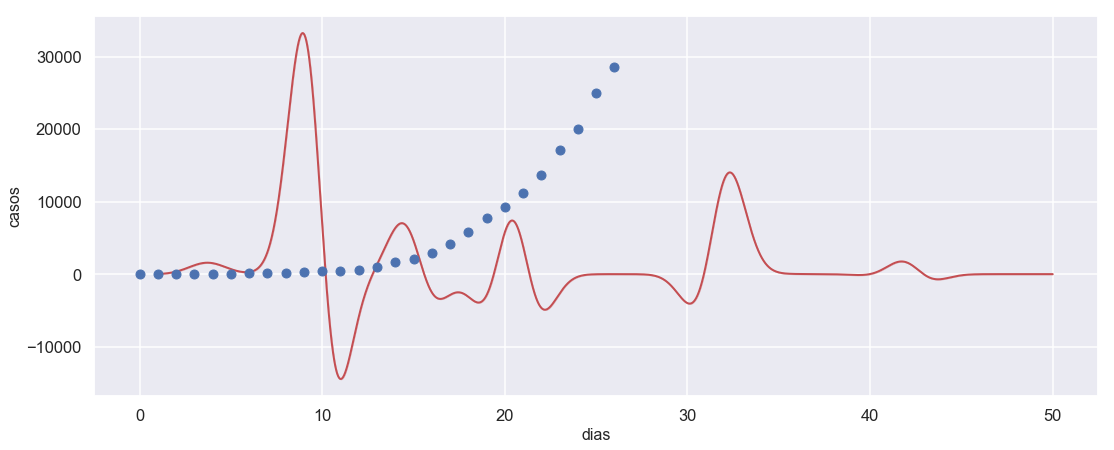

In [23]:
fig = plt.figure(figsize=(18, 7))
np.random.seed(1)
eta = 1
rho = 0.5
sigma = 0.03

# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(x).flatten()

# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    D = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return eta * np.exp(- rho * D)

N = t      # number of training points.
n = 5000        # number of test points.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(1,100, size=(N,1))


K = kernel(X, X)
L = np.linalg.cholesky(K + sigma * np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(1, 50, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
sd_pred = (np.diag(K_) - np.sum(Lk**2, axis=0))**0.5


plt.fill_between(Xtest.flat, mu - 2 * sd_pred, mu + 2 * sd_pred, color="r", alpha=0.2)
plt.plot(Xtest, mu, 'r', lw=2)
plt.plot(x, y, 'o')
plt.xlabel('dias', fontsize=16)
plt.ylabel('casos', fontsize=16, rotation=90)

In [24]:
with pm.Model() as GP:
    mu = np.zeros(N)
    eta = pm.HalfCauchy('eta', 5)
    rho = pm.HalfCauchy('rho', 5)
    sigma = pm.HalfCauchy('sigma', 5)
    
    D = squared_distance(x, x)
    
    K = tt.fill_diagonal(eta * pm.math.exp(-rho * D), eta + sigma)
    
    obs = pm.MvNormal('obs', mu, cov=K, observed=y)

    test_points = np.linspace(1, 50, 100)
    D_pred = squared_distance(test_points, test_points)
    D_off_diag = squared_distance(x, test_points)
    
    K_oo = eta * pm.math.exp(-rho * D_pred)
    K_o = eta * pm.math.exp(-rho * D_off_diag)
    
    mu_post = pm.Deterministic('mu_post', pm.math.dot(pm.math.dot(K_o, tt.nlinalg.matrix_inverse(K)), y))
    SIGMA_post = pm.Deterministic('SIGMA_post', K_oo - pm.math.dot(pm.math.dot(K_o, tt.nlinalg.matrix_inverse(K)), K_o.T))
    
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start)

/opt/anaconda2/lib/python2.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/opt/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
logp = -284.96, ||grad|| = 0.0020648: 100%|██████████| 49/49 [00:00<00:00, 380.96it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, rho, eta]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2d2ca7d0>,
      dtype=object)

<Figure size 1008x1008 with 0 Axes>

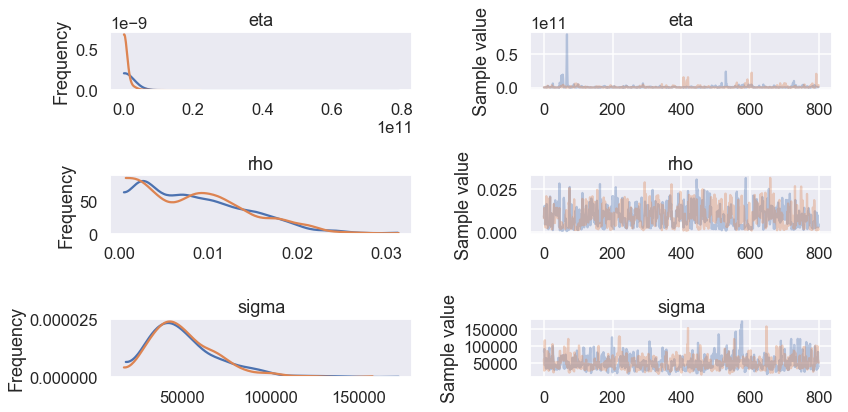

In [25]:
fig = plt.figure(figsize=(14, 14))
varnames = ['eta', 'rho', 'sigma']
chain = trace[200:]
pm.traceplot(chain, varnames)

In [26]:
pm.summary(chain, varnames).round(4)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
eta,1.045745e+09,2.884200e+09,1.241330e+08,4.281468e+07,3.463452e+09,483.946,0.9996
rho,8.900000e-03,5.900000e-03,3.000000e-04,7.000000e-04,1.980000e-02,424.847,0.9995
sigma,5.197130e+04,2.093471e+04,8.870080e+02,2.054927e+04,9.422965e+04,474.595,0.9995


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


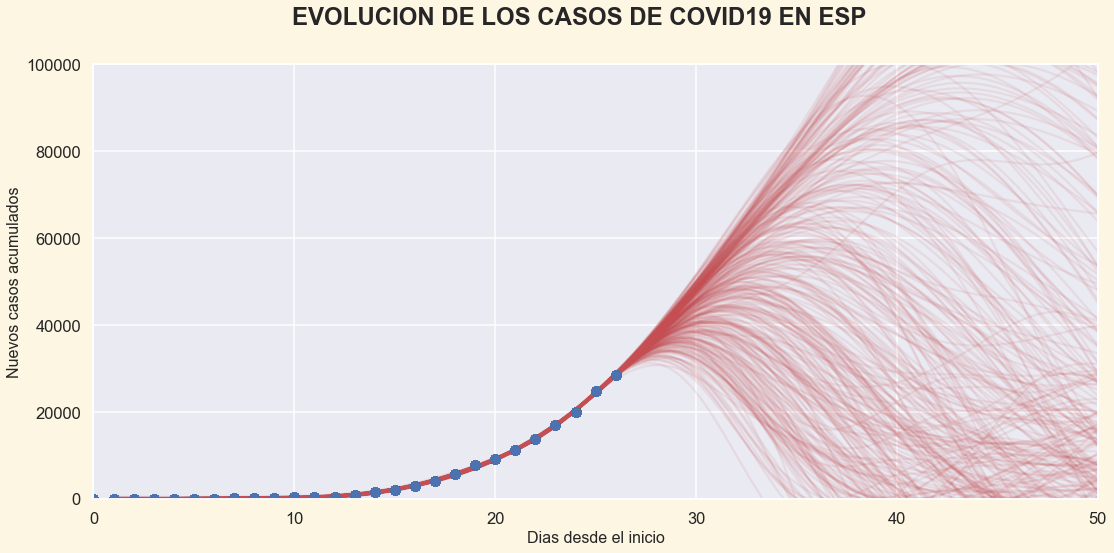

In [36]:
with plt.style.context('Solarize_Light2'):
    fig = plt.figure(figsize=(18, 8))
    y_pred = [np.random.multivariate_normal(m, S) for m,S in zip(chain['mu_post'][::5], chain['SIGMA_post'][::5])]
for yp in y_pred: 
    fig.suptitle('EVOLUCION DE LOS CASOS DE COVID19 EN ESP', fontweight=800, fontsize=24 )
    plt.plot(test_points, yp, 'r', alpha=0.1)
    plt.plot(x, y, 'bo')
    plt.xlim(0, 50)
    plt.ylim(-50, 100000)  
plt.xlabel('Dias desde el inicio', fontsize=16)
plt.ylabel('Nuevos casos acumulados', fontsize=16, rotation=90)
plt.show()